<a href="https://colab.research.google.com/github/saivaishnav21/LabAssign2/blob/main/labassign3_group12_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Interclass Distance: 0.4156073244281112


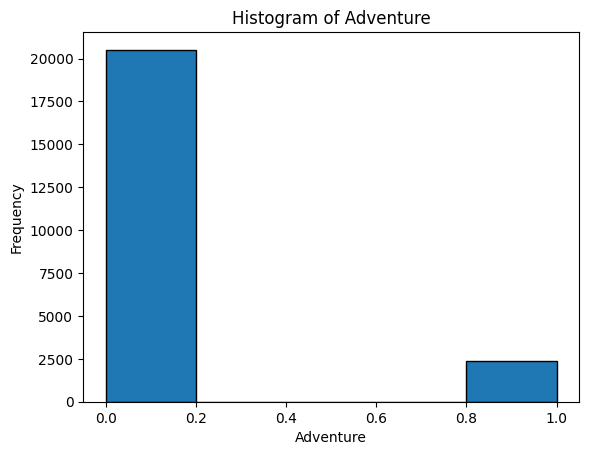

Mean of Adventure: 0.1035175879396985, Variance: 0.09280169692679185


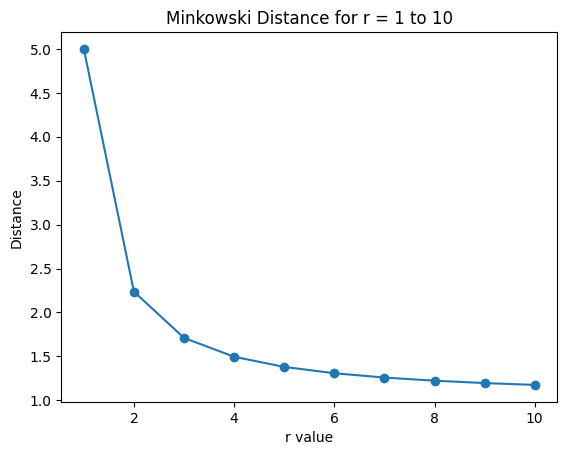

Test Accuracy: 0.80
Predictions: [0 1 1 0 1 0 0 1 1 0]


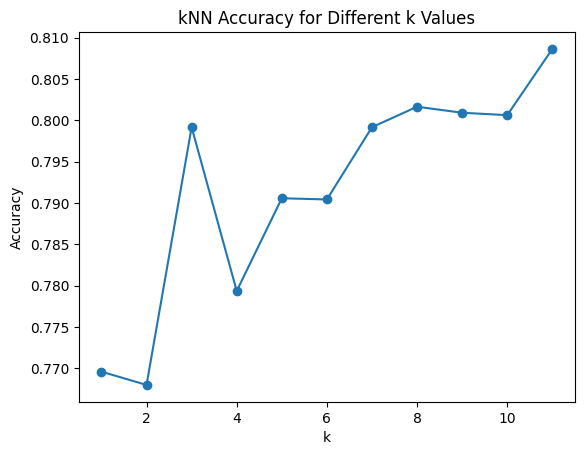

Confusion Matrix:
 [[4191  459]
 [ 920 1296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      4650
           1       0.74      0.58      0.65      2216

    accuracy                           0.80      6866
   macro avg       0.78      0.74      0.76      6866
weighted avg       0.79      0.80      0.79      6866



In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Mount Google Drive (if using Drive)
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/Lab3ML/movies.xlsx'
movies_df = pd.read_excel(file_path)

# One-Hot Encoding for genres
movies_df_expanded = movies_df.drop(columns=['title', 'movieId'])
movies_df_expanded = movies_df_expanded.join(movies_df_expanded['genres'].str.get_dummies(sep='|'))
movies_df_expanded = movies_df_expanded.drop(columns=['genres'])

# Selecting two random classes for classification tasks
# Here, we classify movies based on whether they belong to 'Action' or 'Comedy'
movies_df_expanded = movies_df_expanded[(movies_df_expanded['Action'] == 1) | (movies_df_expanded['Comedy'] == 1)]
X = movies_df_expanded.drop(columns=['Action', 'Comedy'])
y = movies_df_expanded['Action']  # 'Action' as 1, 'Comedy' as 0

# A1: Calculate intra-class spread & inter-class distances
def class_statistics(X, y):
    class_0 = X[y == 0]  # Comedy
    class_1 = X[y == 1]  # Action

    centroid_0 = class_0.mean(axis=0)
    centroid_1 = class_1.mean(axis=0)

    spread_0 = class_0.std(axis=0)
    spread_1 = class_1.std(axis=0)

    interclass_distance = np.linalg.norm(centroid_0 - centroid_1)

    return centroid_0, spread_0, centroid_1, spread_1, interclass_distance

centroid_0, spread_0, centroid_1, spread_1, interclass_distance = class_statistics(X, y)
print(f"Interclass Distance: {interclass_distance}")

# A2: Plot histogram for any feature and calculate mean & variance
feature = 'Adventure'
plt.hist(X[feature], bins=5, edgecolor='black')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

mean_feature = np.mean(X[feature])
var_feature = np.var(X[feature])
print(f"Mean of {feature}: {mean_feature}, Variance: {var_feature}")

# A3: Minkowski Distance between two feature vectors
def minkowski_distance(v1, v2, r):
    return np.sum(np.abs(v1 - v2) ** r) ** (1/r)

vec1, vec2 = X.iloc[0], X.iloc[1]
distances = [minkowski_distance(vec1, vec2, r) for r in range(1, 11)]

plt.plot(range(1, 11), distances, marker='o')
plt.title("Minkowski Distance for r = 1 to 10")
plt.xlabel("r value")
plt.ylabel("Distance")
plt.show()

# A4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# A5: Train kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# A6: Test accuracy
accuracy = knn.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# A7: Predict behavior of kNN classifier
predictions = knn.predict(X_test)
print("Predictions:", predictions[:10])

# A8: Vary k from 1 to 11 and plot accuracy
k_values = range(1, 12)
accuracies = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_test, y_test) for k in k_values]

plt.plot(k_values, accuracies, marker='o')
plt.title("kNN Accuracy for Different k Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

# A9: Confusion Matrix and Performance Metrics
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, predictions)
print("Classification Report:\n", report)
